In [42]:
import matplotlib.pyplot as plt
import networkx as nx
from heapq import heappop, heappush
from collections import deque

In [43]:
def carregar_mapa(nome_arquivo):
    G = nx.Graph()
    portos = {}
    with open(nome_arquivo, "r", encoding="utf-8") as f:
        mapa = [linha.strip() for linha in f if linha.strip()]
    l, c = map(int, mapa[0].split())
    mapa = mapa[1:]

    for i in range(l):
        for j in range(c):
            v = mapa[i][j]
            if v != '*':
                G.add_node((i, j), value=v)
                if v.isdigit():
                    portos[int(v)] = (i, j)
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < l and 0 <= nj < c and mapa[ni][nj] != '*':
                        G.add_edge((i, j), (ni, nj), weight=1)
    return G, portos

Usando source 3 -> target 5


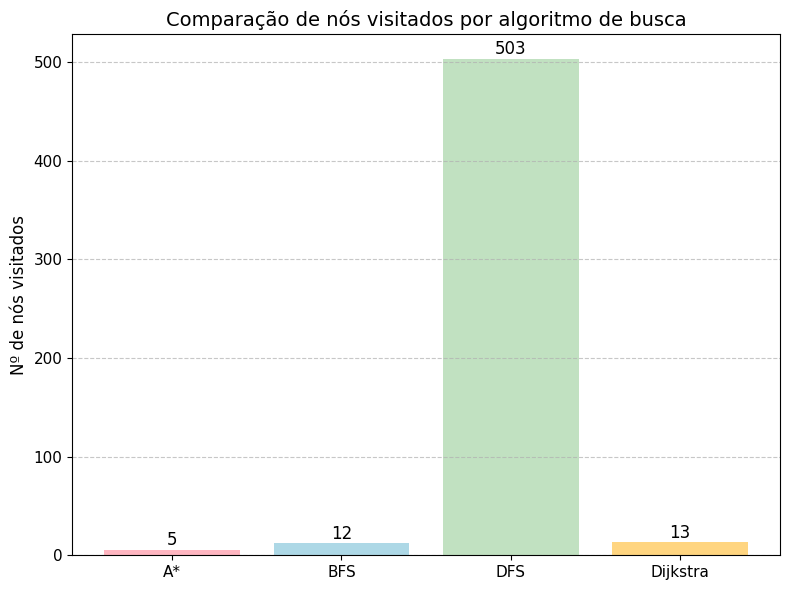

In [44]:
G, portos = carregar_mapa("case0.map")

# Testar apenas portos válidos
for i in portos:
    for j in portos:
        if i != j and portos[i] in G.nodes and portos[j] in G.nodes:
            source, target = portos[i], portos[j]
            print(f"Usando source {i} -> target {j}")
            break
    else:
        continue
    break

from heapq import heappop, heappush

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar_com_contador(G, start, goal):
    visitados = set()
    fila = [(0 + manhattan(start, goal), 0, start)]
    contador = 0

    while fila:
        estimado, custo, atual = heappop(fila)
        contador += 1
        if atual == goal:
            return contador
        if atual in visitados:
            continue
        visitados.add(atual)
        for vizinho in G.neighbors(atual):
            novo_custo = custo + G[atual][vizinho].get("weight", 1)
            prioridade = novo_custo + manhattan(vizinho, goal)
            heappush(fila, (prioridade, novo_custo, vizinho))
    return contador



# DFS com contador
def dfs_com_contador(G, start, goal):
    visitados = set()
    pilha = [start]
    contador = 0

    while pilha:
        no = pilha.pop()
        if no in visitados:
            continue
        visitados.add(no)
        contador += 1
        if no == goal:
            return contador
        pilha.extend([viz for viz in G.neighbors(no) if viz not in visitados])
    return contador

# Dijkstra com contador
def dijkstra_com_contador(G, start, goal):
    visitados = set()
    dist = {n: float("inf") for n in G.nodes}
    dist[start] = 0
    fila = [(0, start)]
    contador = 0

    while fila:
        d, atual = heappop(fila)
        contador += 1
        if atual == goal:
            return contador
        if atual in visitados:
            continue
        visitados.add(atual)
        for vizinho in G.neighbors(atual):
            nova_dist = d + G[atual][vizinho].get("weight", 1)
            if nova_dist < dist[vizinho]:
                dist[vizinho] = nova_dist
                heappush(fila, (nova_dist, vizinho))
    return contador



# Dicionário de resultados
resultados = {
    "A*": astar_com_contador(G, source, target),
    "BFS": bfs_com_contador(G, source, target),
    "DFS": dfs_com_contador(G, source, target),
    "Dijkstra": dijkstra_com_contador(G, source, target),
}

# 🎨 Gráfico bonito
cores = ['#FFB6C1', '#ADD8E6', '#C1E1C1', '#FFD580']
fig, ax = plt.subplots(figsize=(8, 6))
barras = ax.bar(resultados.keys(), resultados.values(), color=cores)

# Rótulos nas barras
for barra in barras:
    y = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, y + 5, f"{int(y)}", ha='center', fontsize=12)

# Estética geral
ax.set_ylabel("Nº de nós visitados", fontsize=12)
ax.set_title("Comparação de nós visitados por algoritmo de busca", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


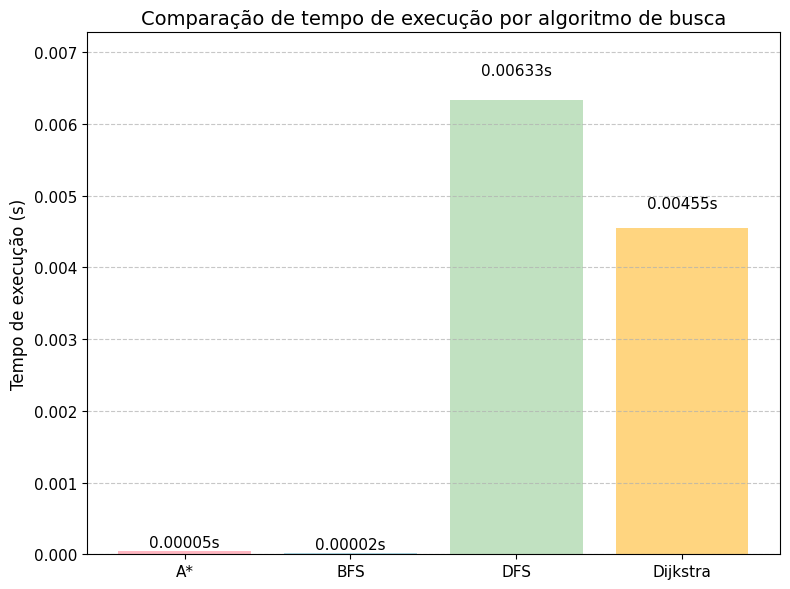

In [45]:
import time
import matplotlib.pyplot as plt
import networkx as nx
from heapq import heappop, heappush
from collections import deque

# Funções de busca

def medir_tempo(func, G, source, target):
    inicio = time.time()
    func(G, source, target)
    fim = time.time()
    return fim - inicio

# Dicionário com os métodos e funções
algoritmos = {
    "A*": astar_com_contador,
    "BFS": bfs_com_contador,
    "DFS": dfs_com_contador,
    "Dijkstra": dijkstra_com_contador,
}

# Medir tempo para cada algoritmo
tempos = {nome: medir_tempo(func, G, source, target) for nome, func in algoritmos.items()}

# 🎨 Gráfico bonito
cores = ['#FFB6C1', '#ADD8E6', '#C1E1C1', '#FFD580']
fig, ax = plt.subplots(figsize=(8, 6))
barras = ax.bar(tempos.keys(), tempos.values(), color=cores, )

# Cálculo da altura máxima + margem de 10%
altura_maxima = max(tempos.values())
ax.set_ylim(0, altura_maxima * 1.15)  # margem superior

# Rótulos ajustados
for barra in barras:
    y = barra.get_height()
    deslocamento = max(y * 0.05, 0.00001)
    ax.text(
        barra.get_x() + barra.get_width()/2,
        y + deslocamento,
        f"{y:.5f}s",
        ha='center',
        va='bottom',
        fontsize=11,
    )

# Estética
ax.set_ylabel("Tempo de execução (s)", fontsize=12)
ax.set_title("Comparação de tempo de execução por algoritmo de busca", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
